In [1]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np, histogram.hdf as hh, histogram as H
from scipy.special import erf
from scipy.optimize import minimize,curve_fit
from lmfit import Model
import convolutionF as F

In [2]:
mcvineSol='/home/fi0/simulations/ARCS/powder-res-demo_1/res-sim/iqe.h5'

In [3]:
RF= hh.load(mcvineSol)

/home/fi0/anaconda2/lib/python2.7/site-packages/histogram/hdf/Loader.py:129: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'storage' in list(dataGroup): # this uses the 'storage' convention


plot z in (0, 6.05300124953e-07)


/home/fi0/anaconda2/lib/python2.7/site-packages/histogram/data_plotter.py:352: RuntimeWarning: invalid value encountered in less
  negative_median = N.median( z[ z<0 ] )
/home/fi0/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/fi0/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/fi0/anaconda2/lib/python2.7/site-packages/histogram/data_plotter.py:334: RuntimeWarning: invalid value encountered in greater
  positive_median = N.median( z[ z>0 ] )


<IPython.core.display.Javascript object>


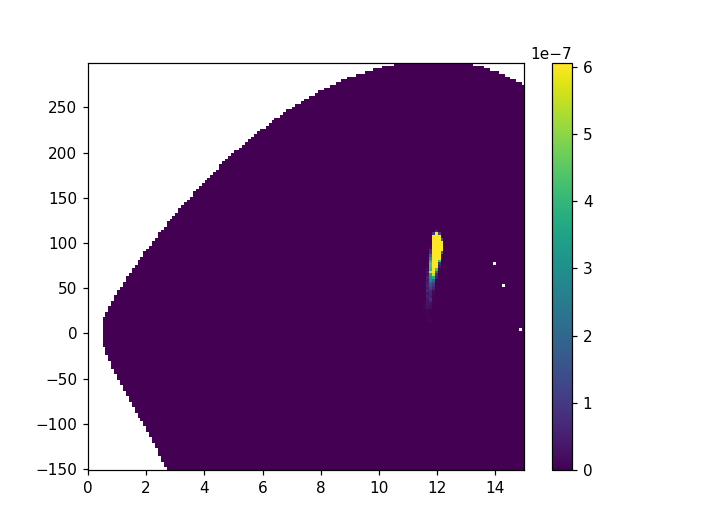

In [4]:
H.plot(RF, min=0)

In [58]:
#print(RF)

In [59]:
ie = RF[(10,14), (0,297)].sum('Q')
ie.I[np.isnan(ie.I)] = 0
#print(ie)

<IPython.core.display.Javascript object>


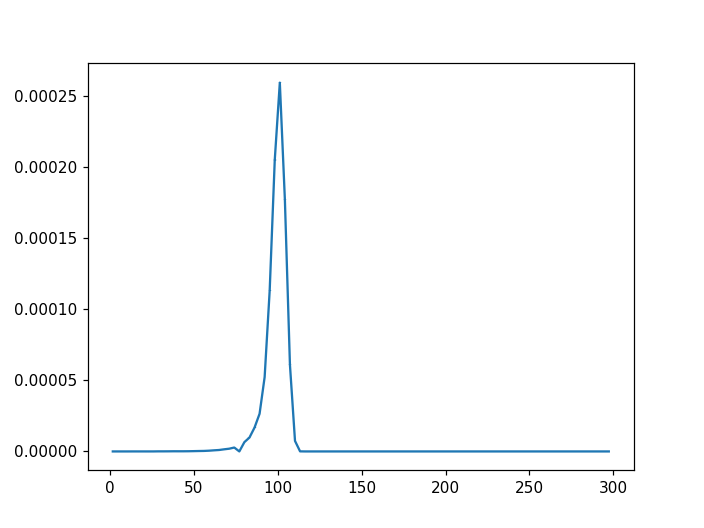

In [36]:
H.plot(ie)

[[Model]]
    (Model(gaussian) * Model(error))
[[Fit Statistics]]
    # function evals   = 38
    # data points      = 99
    # variables        = 3
    chi-square         = 0.000
    reduced chi-square = 0.000
    Akaike info crit   = -2456.129
    Bayesian info crit = -2448.344
[[Variables]]
    amp:   0.00269435 +/- 3.33e-05 (1.24%) (init= 0.00025)
    cen:   100.390771 +/- 0.060579 (0.06%) (init= 100)
    wid:   4.24202966 +/- 0.060579 (1.43%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(amp, wid)                  =  0.577 



<IPython.core.display.Javascript object>


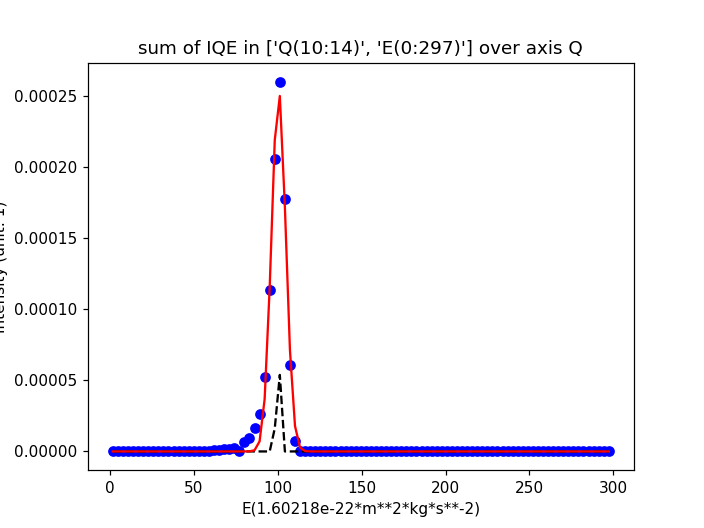

In [37]:

x = ie.E
y = ie.I

def gaussian(x, amp, cen, wid):
    "1-d gaussian: gaussian(x, amp, cen, wid)"
    return (amp/(np.sqrt(2*np.pi)*wid)) * np.exp(-(x-cen)**2 /(2*wid**2))

def error(x):
    "1-d error: error(x)"
    return erf(x)

mod = Model(gaussian) * Model(error)
pars  = mod.make_params( amp=0.00025, cen=100, wid=1)

result = mod.fit(y, pars, x=x)

print(result.fit_report())

plt.plot(x, y,         'bo')
plt.plot(x, result.init_fit, 'k--')
plt.plot(x, result.best_fit, 'r-')
plt.show()
#print(result.best_fit)

In [38]:
comps = result.eval_components(x=x)

In [39]:
# plt.plot(x,comps['gaussian'])
# plt.plot(x,comps['error'])
# plt.show()

In [40]:
dos_30= hh.load('/home/fi0/dev/Ei_30/work/final-dos.h5')

In [41]:
dos_130=hh.load('/home/fi0/dev/Ei_130/work/final-dos.h5')

In [42]:
dos_300=hh.load('/home/fi0/dev/Ei_300/work/final-dos.h5')

<IPython.core.display.Javascript object>


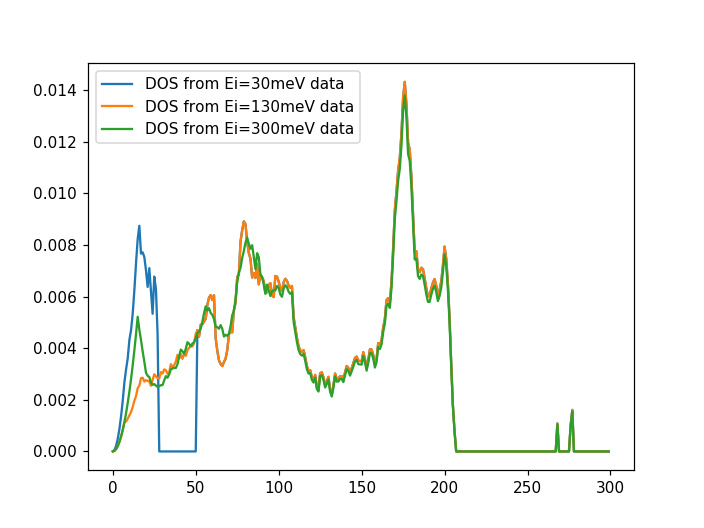

In [43]:
plt.plot(dos_30.E, dos_30.I,  label='DOS from Ei=30meV data')
plt.plot(dos_130.E, dos_130.I,  label='DOS from Ei=130meV data')
plt.plot(dos_300.E, dos_300.I,  label='DOS from Ei=300meV data')
plt.legend()
plt.show()

In [55]:
# g='same'
# con=F.convolve_all(dos_300.I[0:297],result.best_fit,g)  #convolved signal 
# plt.plot(con,label='convolved signal, #of iteration {}'.format(no_iteration))
# plt.legend()
# plt.show ()

In [60]:
ini=(np.sum(dos_300.I[0:297],0)/len(dos_300.I[0:297])) * np.ones(len(dos_300.I[0:297]))#initial guess
#print(ini)

In [61]:
g='same'
no_iteration=40
I=F.deconvolve(dos_300.I[0:297],result.best_fit,ini,g,'iteration',no_iteration)  #deconvolved signal 
#print(I)

<IPython.core.display.Javascript object>


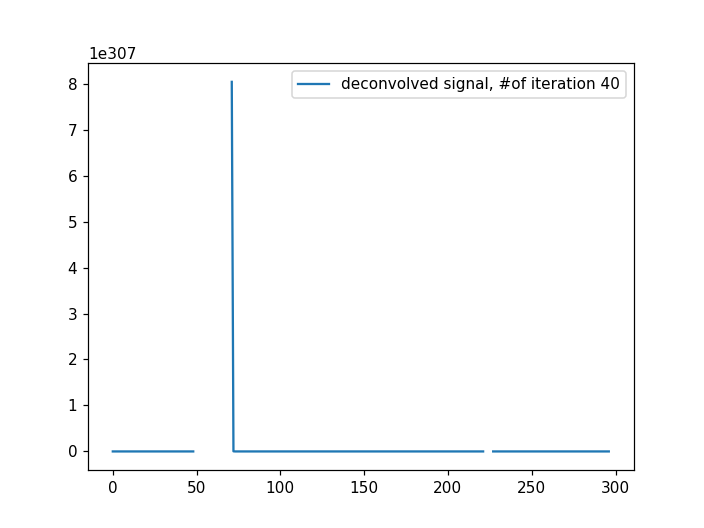

In [62]:
plt.plot(I,label='deconvolved signal, #of iteration {}'.format(no_iteration))
plt.legend()
plt.show ()